In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 이용할 수 있는 데이터 불러와서 확인
1. 송파구 대여/반납 데이터(2305~2405)
2. 날씨/대기 병합 데이터


In [3]:
songpa=pd.read_csv('../data/반납추가.csv')
songpa.head()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_1099/1013668571.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  songpa=pd.read_csv('../data/반납추가.csv')


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구


In [4]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

---
### 날씨/대기 데이터 확인 및 전처리

In [5]:
weather=pd.read_csv('../data/송파구날씨통합.csv')
weather.head()

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),date,시간,PM10,PM25
0,108,서울,2023-05-01 00:00:00,12.1,0.0,87,9,1049,2023-05-01,0,67.0,30.0
1,108,서울,2023-05-01 01:00:00,11.6,0.0,88,6,957,2023-05-01,1,66.0,26.0
2,108,서울,2023-05-01 02:00:00,11.0,0.0,90,6,778,2023-05-01,2,64.0,28.0
3,108,서울,2023-05-01 03:00:00,10.8,0.0,91,8,672,2023-05-01,3,58.0,22.0
4,108,서울,2023-05-01 04:00:00,10.4,0.0,92,8,633,2023-05-01,4,56.0,22.0


In [6]:
# weather.drop(
#     ['지점','지점명','일시', '전운량(10분위)'],
#     axis=1,
#     inplace=True
# )

In [7]:
weather.head()

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),date,시간,PM10,PM25
0,108,서울,2023-05-01 00:00:00,12.1,0.0,87,9,1049,2023-05-01,0,67.0,30.0
1,108,서울,2023-05-01 01:00:00,11.6,0.0,88,6,957,2023-05-01,1,66.0,26.0
2,108,서울,2023-05-01 02:00:00,11.0,0.0,90,6,778,2023-05-01,2,64.0,28.0
3,108,서울,2023-05-01 03:00:00,10.8,0.0,91,8,672,2023-05-01,3,58.0,22.0
4,108,서울,2023-05-01 04:00:00,10.4,0.0,92,8,633,2023-05-01,4,56.0,22.0


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         9528 non-null   int64  
 1   지점명        9528 non-null   object 
 2   일시         9528 non-null   object 
 3   기온(°C)     9528 non-null   float64
 4   강수량(mm)    9528 non-null   float64
 5   습도(%)      9528 non-null   int64  
 6   전운량(10분위)  9528 non-null   int64  
 7   시정(10m)    9528 non-null   int64  
 8   date       9528 non-null   object 
 9   시간         9528 non-null   int64  
 10  PM10       9363 non-null   float64
 11  PM25       9385 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 893.4+ KB


**미세먼지 기준(좋음/보통/나쁨/매우나쁨)**
- PM10: ~30/~80/~150/151~
- PM2.5: ~15/~35/~75/75~

---
### 따릉이 데이터 확인

In [9]:
songpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   float64
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
 17  자치구       object 
 18  반납 자치구    object 
dtypes: float64(2), int64(3), object(14)
memory usage: 753.8+ MB


In [10]:
songpa.drop(
    ['이용거리(M)', '생년'],
    axis=1,
    inplace=True
)

<Axes: >

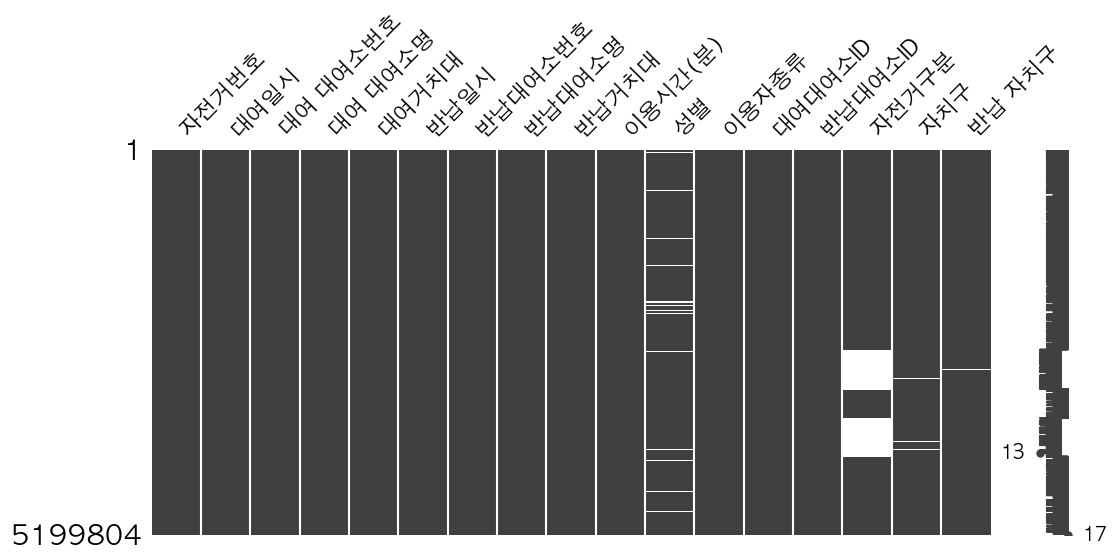

In [11]:
import missingno as msno 

msno.matrix(songpa, figsize=(12, 5))

> 성별, 자전거구분, 자치구, 반납 자치구에 null값이 있다.    
> 자전거구분의 경우 이용자의 생년을 이용하여 대치하려 했지만, 이용자 생년 데이터가 이상해서(1911~2099까지 있음, 이용자 임의 입력?) 사용 불가해 보인다.

In [12]:
songpa['date']=pd.to_datetime(songpa['대여일시'])
songpa['time']=songpa['date'].dt.hour

In [13]:
songpa['date']=songpa['date'].dt.date

In [14]:
songpa['time'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [15]:
songpa.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,date,time
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구,2024-04-01,0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구,2024-04-01,0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구,2024-04-01,0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구,2024-04-01,0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구,2024-04-01,0


In [16]:
songpa.drop(
    ['대여거치대','반납거치대'],
    axis=1,
    inplace=True
)

In [17]:
songpa['이용시간(분)'].unique()

array([  0,   1,   3, ..., 585, 954, 920])

**요일  추가**

In [18]:
import holidays
# 대한민국 공휴일 불러오기
kr_holidays = holidays.KR(years=range(2020,2025))

In [19]:
songpa['date']=pd.to_datetime(songpa['date'])
days=["월", "화", "수", "목", "금", "토", "일"]

songpa['day']=songpa['date'].dt.weekday.map(dict(enumerate(days)))
songpa.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,date,time,day
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구,2024-04-01,0,월
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구,2024-04-01,0,월
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893.0,문정법조단지12,3,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구,2024-04-01,0,월
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구,2024-04-01,0,월
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구,2024-04-01,0,월


In [20]:
# # 요일 데이터 업데이트 함수 정의
# def update_holiday(row):
#     if row['date'] in kr_holidays:
#         return 2  
#     else:
#         return row['요일']  # 기존 요일 값 유지
    
# # 데이터프레임에 함수 적용
# songpa['요일'] = songpa.apply(update_holiday, axis=1)

# songpa.head()

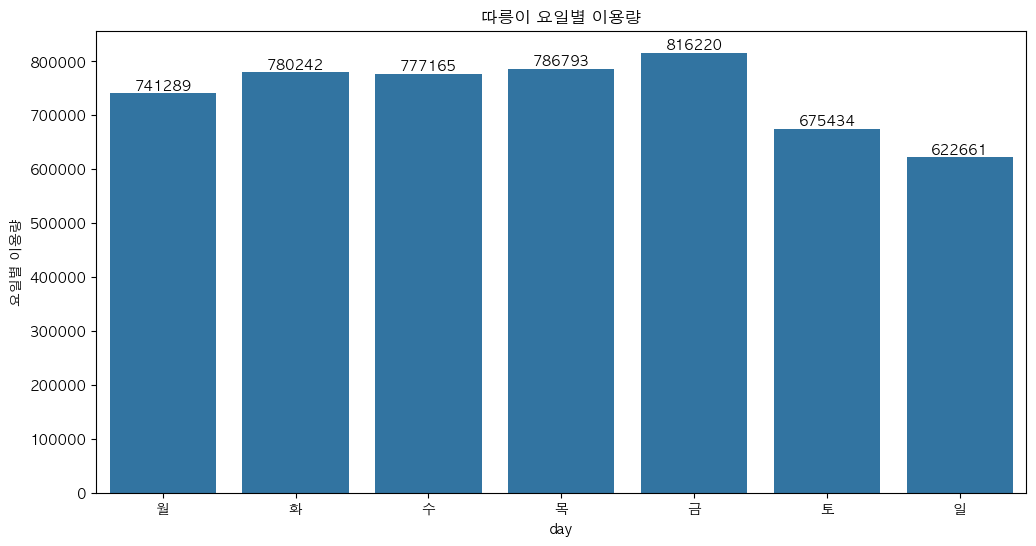

In [21]:
day_order = ['월', '화', '수', '목', '금', '토', '일']
day_counts = songpa.groupby('day').size().reset_index(name='count')
day_counts['day'] = pd.Categorical(day_counts['day'], categories=day_order, ordered=True)
day_counts=day_counts.sort_values('day')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='day', y='count', data=day_counts, order=day_order)

# 각 막대 위에 count 수 표시
for i, v in enumerate(day_counts['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('요일별 이용량')
plt.title('따릉이 요일별 이용량')
plt.show()

> 평일(월~금)의 이용량은 대체로 비슷하면서 금요일의 이용량이 가장 많고, 주말(토, 일)의 이용량은 평일에 비해 약 15~20%정도 적다.
- 평일에 비해 주말의 이용량이 적은 것은 따릉이를 평일 통근에 이용하는 사람의 수가 많아서인 것으로 추측된다.
- 금요일 이용량이 다른 요일에 비해 다소 많은 것은 통근 이용자 + 금요일 저녁 이용자 때문일 것으로 추측된다.

> 월~목과 금요일의 차이가 많이 크지는 않으므로 평일(월~금)과 주말 및 공휴일 두 가지로 분류해도 괜찮을 것 같다.

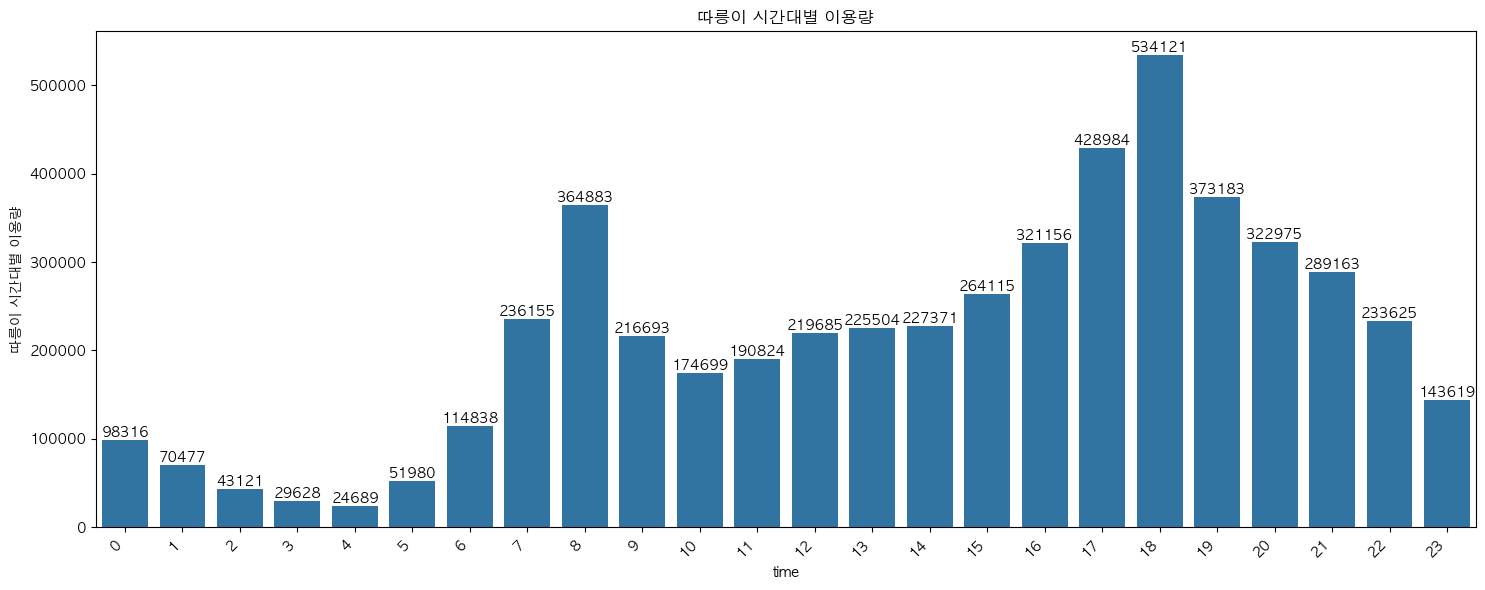

In [22]:
time_counts = songpa.groupby('time').size().reset_index(name='count')
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='time', y='count', data=time_counts)

# y축 레이블 설정
plt.ylabel('따릉이 시간대별 이용량')

# x축 레이블 회전 (가독성을 위해)
plt.xticks(rotation=45, ha='right')

# 각 막대 위에 이용량 표시
for i, v in enumerate(time_counts['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

# 그래프 제목 추가
plt.title('따릉이 시간대별 이용량')

# 그래프 표시
plt.tight_layout()
plt.show()

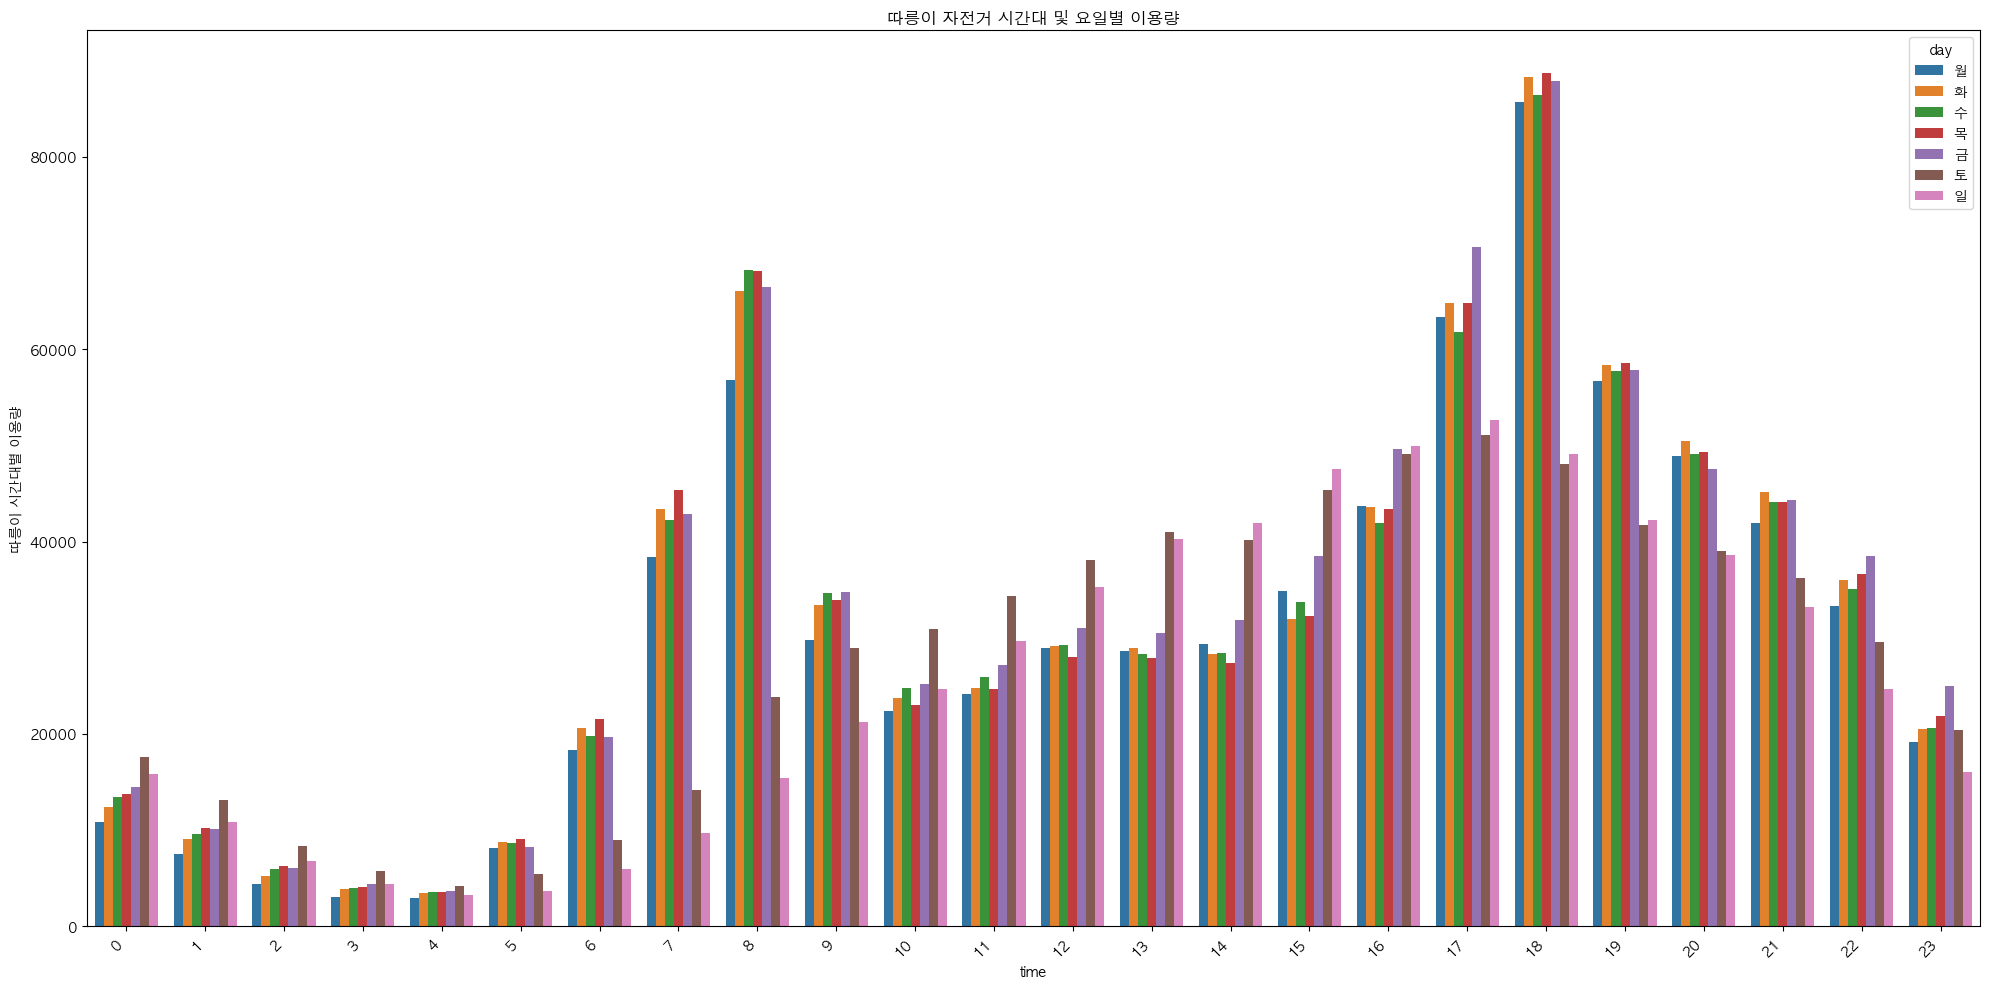

In [23]:
# 시간대와 요일별 이용량 계산
time_day_counts = songpa.groupby(['time', 'day']).size().reset_index(name='count')

day_order = ['월', '화', '수', '목', '금', '토', '일']
time_day_counts['day'] = pd.Categorical(time_day_counts['day'], categories=day_order, ordered=True)

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 막대 그래프 그리기
ax = sns.barplot(x='time', y='count', hue='day', data=time_day_counts)

# y축 레이블 설정
plt.ylabel('따릉이 시간대별 이용량')

# x축 레이블 회전 (가독성을 위해)
plt.xticks(rotation=45, ha='right')

# 그래프 제목 추가
plt.title('따릉이 자전거 시간대 및 요일별 이용량')

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

> 0~3시 및 10~16시의 이용량은 주말이 평일보다 많고, 그 이외 시간대의 이용량은 평일이 주말보다 많다.

In [24]:
print(songpa['대여 대여소명'].value_counts().nlargest(10))
print()
print(songpa['반납대여소명'].value_counts().nlargest(10))

대여 대여소명
롯데월드타워(잠실역2번출구 쪽)    129032
송파구청                  90318
올림픽공원역 3번출구           87641
방이삼거리                 77252
송파나루역 4번 출구옆          76783
몽촌토성역 3번 출구           75368
잠실역 8번출구              63180
잠실새내역 5번 출구 뒤         63080
아산병원 기숙사 부근           62263
천호역 10번 출구 앞          55131
Name: count, dtype: int64

반납대여소명
롯데월드타워(잠실역2번출구 쪽)    128687
송파구청                  92896
올림픽공원역 3번출구           87287
방이삼거리                 80781
송파나루역 4번 출구옆          79750
몽촌토성역 3번 출구           75242
아산병원 기숙사 부근           66717
잠실새내역 5번 출구 뒤         64314
잠실역 8번출구              62740
천호역 10번 출구 앞          55097
Name: count, dtype: int64


- 대여와 반납이 가장 많은 대여소는 모두 **롯데월드타워(잠실역2번출구 쪽)** 이고, 반납과 대여 수가 거의 비슷하다.    
- 반납/대여 top10의 반납/대여 수는 거의 동일하지만, **아산병원 기숙사 부근** 에서 반납 수가 대여 수보다 다소 많아 순위가 조금 다르다.

In [25]:
abs(songpa['대여 대여소명'].value_counts()-songpa['반납대여소명'].value_counts()).nlargest(10)

잠실근린공원             5472.0
문정법조단지12           5412.0
방이초등학교             4591.0
문정시영아파트 5동 앞 공원    4525.0
아산병원 기숙사 부근        4454.0
리센츠아파트             3711.0
방이삼거리              3529.0
서울체육고등학교 앞         3105.0
풍납백제문화공원 옆 인근      3080.0
종합운동장역 4번출구        3070.0
Name: count, dtype: float64

- 대여 수와 반납 수 차이(절댓값)의 top10 중 대여/반납 수와 일치하는 정류소는 **아산병원 기숙사 부근**과 **방이삼거리**이다.

In [26]:
station_list = abs(songpa['대여 대여소명'].value_counts()-songpa['반납대여소명'].value_counts()).nlargest(10).index.tolist()

In [27]:
for station in station_list:
    count = len(songpa[songpa['대여 대여소명'] == station])
    print(f"{station}: {count}")

잠실근린공원: 35916
문정법조단지12: 30755
방이초등학교: 35680
문정시영아파트 5동 앞 공원: 12008
아산병원 기숙사 부근: 62263
리센츠아파트: 25837
방이삼거리: 77252
서울체육고등학교 앞: 22055
풍납백제문화공원 옆 인근: 39101
종합운동장역 4번출구: 22813


- **아산병원 기숙사 부근**과 **방이삼거리**를 제외한 다른 대여소의 경우 대여/반납의 차이가 비교적 큰 것을 알 수 있다.(대체로 10% 이상 차이남)
- 대여/반납의 비율로만 따지면 거의 이용량이 없는 대여소나 타지역의 대여소의 비율이 높게 나오므로, 이용량이 비교적 많은 대여소 중 대여/반납의 불균형이 큰 대여소의 리스트를 위의 리스트로 선택해도 좋을 것 같다.

In [28]:
songpa['return_date']=pd.to_datetime(songpa['반납일시'])
songpa['return_time']=songpa['return_date'].dt.hour
songpa['return_date']=songpa['return_date'].dt.date

In [29]:
songpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 20 columns):
 #   Column       Dtype         
---  ------       -----         
 0   자전거번호        object        
 1   대여일시         object        
 2   대여 대여소번호     int64         
 3   대여 대여소명      object        
 4   반납일시         object        
 5   반납대여소번호      float64       
 6   반납대여소명       object        
 7   이용시간(분)      int64         
 8   성별           object        
 9   이용자종류        object        
 10  대여대여소ID      object        
 11  반납대여소ID      object        
 12  자전거구분        object        
 13  자치구          object        
 14  반납 자치구       object        
 15  date         datetime64[ns]
 16  time         int32         
 17  day          object        
 18  return_date  object        
 19  return_time  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(14)
memory usage: 753.8+ MB


In [30]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         9528 non-null   int64  
 1   지점명        9528 non-null   object 
 2   일시         9528 non-null   object 
 3   기온(°C)     9528 non-null   float64
 4   강수량(mm)    9528 non-null   float64
 5   습도(%)      9528 non-null   int64  
 6   전운량(10분위)  9528 non-null   int64  
 7   시정(10m)    9528 non-null   int64  
 8   date       9528 non-null   object 
 9   시간         9528 non-null   int64  
 10  PM10       9363 non-null   float64
 11  PM25       9385 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 893.4+ KB


In [31]:
weather['date']=pd.to_datetime(weather['date'])

In [32]:
songpa_merge=pd.merge(songpa, weather, how='left', left_on=['date','time'], right_on=['date','시간'])
songpa_merge.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),성별,이용자종류,...,지점명,일시,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),시간,PM10,PM25
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,\N,내국인,...,서울,2024-04-01 00:00:00,9.5,0.0,50,0,2694,0,54.0,13.0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,M,내국인,...,서울,2024-04-01 00:00:00,9.5,0.0,50,0,2694,0,54.0,13.0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893.0,문정법조단지12,3,M,내국인,...,서울,2024-04-01 00:00:00,9.5,0.0,50,0,2694,0,54.0,13.0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,M,내국인,...,서울,2024-04-01 00:00:00,9.5,0.0,50,0,2694,0,54.0,13.0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,NaN,내국인,...,서울,2024-04-01 00:00:00,9.5,0.0,50,0,2694,0,54.0,13.0


In [33]:
songpa_merge.drop(
    ['지점','지점명','일시','성별','이용자종류'],
    axis=1,
    inplace=True
)
songpa_merge.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),대여대여소ID,반납대여소ID,...,return_date,return_time,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),시간,PM10,PM25
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,ST-1864,ST-1864,...,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,ST-1584,ST-2596,...,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893.0,문정법조단지12,3,ST-2957,ST-2972,...,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,ST-1719,ST-1719,...,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,ST-2581,ST-2598,...,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0


---
### 시간 열 추가

In [34]:
songpa_dum = pd.get_dummies(songpa_merge, columns=['time'], prefix='hour')
songpa_dum.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),대여대여소ID,반납대여소ID,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,ST-1864,ST-1864,...,False,False,False,False,False,False,False,False,False,False
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,ST-1584,ST-2596,...,False,False,False,False,False,False,False,False,False,False
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893.0,문정법조단지12,3,ST-2957,ST-2972,...,False,False,False,False,False,False,False,False,False,False
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,ST-1719,ST-1719,...,False,False,False,False,False,False,False,False,False,False
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,ST-2581,ST-2598,...,False,False,False,False,False,False,False,False,False,False


- 대여소별 예측을 해야하는데, 대여 대여소와 반납 대여소가 서로 다른 경우가 많고, 시간대를 대여/반납 따로 48개를 추가한다고 해도 대여소별로 분리해서 보기는 어려우므로 대여와 반납을 분리해서 분석하는 것이 좋을 것 같다.
---

In [35]:
songpa_re_dum = pd.get_dummies(songpa_merge, columns=['return_time'], prefix='hour')
songpa_re_dum.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),대여대여소ID,반납대여소ID,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,ST-1864,ST-1864,...,False,False,False,False,False,False,False,False,False,False
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,ST-1584,ST-2596,...,False,False,False,False,False,False,False,False,False,False
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893.0,문정법조단지12,3,ST-2957,ST-2972,...,False,False,False,False,False,False,False,False,False,False
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,ST-1719,ST-1719,...,False,False,False,False,False,False,False,False,False,False
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,ST-2581,ST-2598,...,False,False,False,False,False,False,False,False,False,False


In [36]:
songpa_dum.drop(
    ['반납일시','반납대여소번호','반납대여소명','return_date','return_time'],
    axis=1,
    inplace=True
)
songpa_re_dum.drop(
    ['대여일시','대여 대여소번호','대여 대여소명','time'],
    axis=1,
    inplace=True
)

In [37]:
songpa_dum.drop(
    ['시간'],
    axis=1,
    inplace=True
)
songpa_re_dum.drop(
    ['시간'],
    axis=1,
    inplace=True
)

In [38]:
songpa_dum.drop(
    ['습도(%)','전운량(10분위)','시정(10m)'],
    axis=1,
    inplace=True
)
songpa_re_dum.drop(
    ['습도(%)','전운량(10분위)','시정(10m)'],
    axis=1,
    inplace=True
)

- songpa_dum: 대여 데이터
- songpa_re_dum: 반납 데이터

In [39]:
songpa_dum.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간(분),대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,ST-1864,ST-1864,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,1,ST-1584,ST-2596,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,3,ST-2957,ST-2972,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,ST-1719,ST-1719,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,8,ST-2581,ST-2598,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False


In [40]:
songpa_re_dum.head()

,자전거번호,반납일시,반납대여소번호,반납대여소명,이용시간(분),대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,SPB-62435,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,ST-1864,ST-1864,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
1,SPB-58734,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,ST-1584,ST-2596,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
2,SPB-43679,2024-04-01 00:05:08,4893.0,문정법조단지12,3,ST-2957,ST-2972,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
3,SPB-31592,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,ST-1719,ST-1719,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False
4,SPB-69307,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,ST-2581,ST-2598,일반자전거,송파구,송파구,...,False,False,False,False,False,False,False,False,False,False


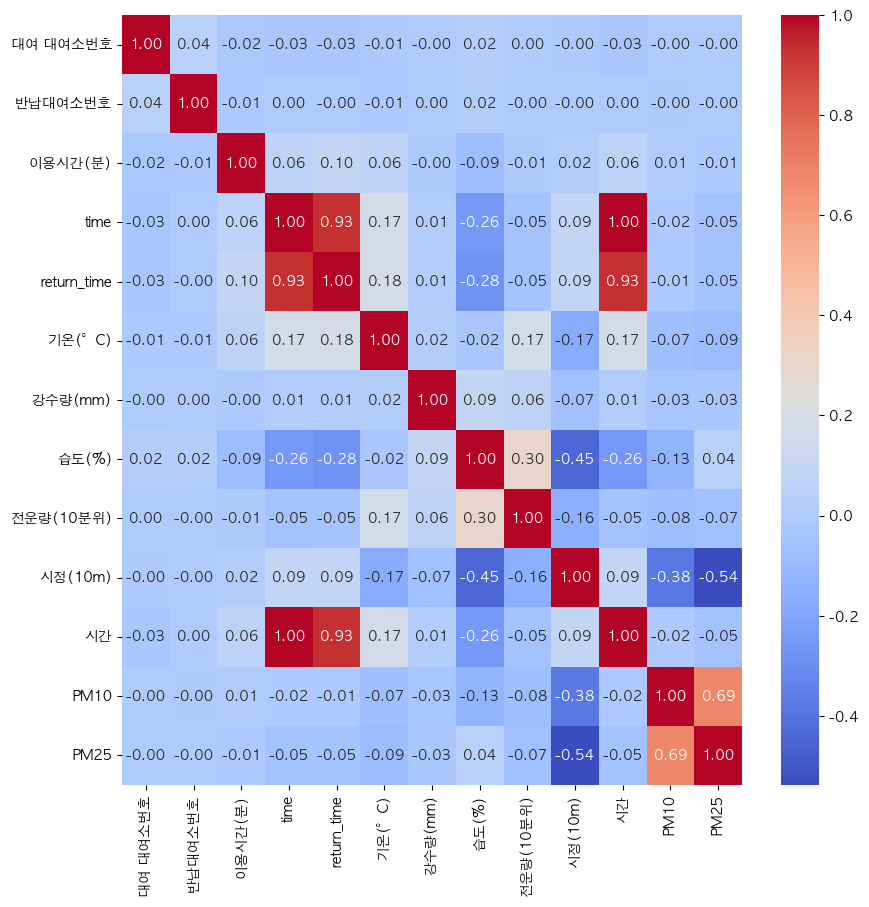

In [41]:
# 숫자형 데이터만 선택
numeric_df = songpa_merge.select_dtypes(include=['number'])

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

---

In [42]:
songpa_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 40 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간(분)   int64         
 5   대여대여소ID   object        
 6   반납대여소ID   object        
 7   자전거구분     object        
 8   자치구       object        
 9   반납 자치구    object        
 10  date      datetime64[ns]
 11  day       object        
 12  기온(°C)    float64       
 13  강수량(mm)   float64       
 14  PM10      float64       
 15  PM25      float64       
 16  hour_0    bool          
 17  hour_1    bool          
 18  hour_2    bool          
 19  hour_3    bool          
 20  hour_4    bool          
 21  hour_5    bool          
 22  hour_6    bool          
 23  hour_7    bool          
 24  hour_8    bool          
 25  hour_9    bool          
 26  hour_10   bool          
 27  hour_11   bo

In [43]:
rent_sum=songpa_dum.pivot_table(
                            songpa_dum.iloc[:,16:],
                            index=['date','day','기온(°C)','강수량(mm)','대여 대여소명'],
                            aggfunc='sum'
)

In [44]:
hour_columns = ['hour_' + str(i) for i in range(24)]
other_columns = [col for col in rent_sum.columns if col not in hour_columns]
rent_sum = rent_sum.reindex(columns=other_columns + hour_columns)

In [45]:
rent_sum.head(20)

hour_0  hour_1  hour_2  hour_3  hour_4  \
date       day 대여 대여소명                                                        
2023-05-01 월   3호선 매봉역 3번출구앞              3       0       0       0       0   
               63스퀘어                      0       0       0       0       0   
               7호선 이수역7번출구                0       0       0       0       0   
               9호선종합운동장역 9번출구             0       0       0       0       0   
               HID 유족동지회 앞                0       0       0       0       0   
               H비즈니스파크                    0       0       0       0       0   
               JK장평타워                     0       0       0       0       0   
               JW타워                       0       0       0       0       0   
               K+ 타워 앞                    0       0       1       0       0   
               KT&G강동지사                   1       0       0       0       0   
               KT&G타워 옆(상상마당 대치아트홀)       0       0       0       0       0   
               KT선릉타워                     0       0       0       0       0   
               LH 서초 4단지 403동             0       0       0       0       0   
               LH강남힐스테이트아파트               0       0       0       0       0   
               LH서초3단지 301동 맞은편           0       0       0       0       0   
               LIGA 아파트 앞                 0       0       0       0       0   
               SB타워 앞                     0       0       0       0       0   
               SSTS 몰 앞                   0       0       0       0       0   
               가든파이브 리빙관                  1       1       0       0       0   
               가락1동주민센터                   1       0       0       0       0   

                                     hour_5  hour_6  hour_7  hour_8  hour_9  \
date       day 대여 대여소명                                                        
2023-05-01 월   3호선 매봉역 3번출구앞              0       0       0       0       0   
               63스퀘어                      0       0       0       0       0   
               7호선 이수역7번출구                0       0       0       0       0   
               9호선종합운동장역 9번출구             0       2       2       4       0   
               HID 유족동지회 앞                0       0       0       0       0   
               H비즈니스파크                    0       0       0       1       5   
               JK장평타워                     0       0       0       0       0   
               JW타워                       0       0       0       0       0   
               K+ 타워 앞                    0       0       0       1       0   
               KT&G강동지사                   0       0       0       2       1   
               KT&G타워 옆(상상마당 대치아트홀)       0       0       0       0       0   
               KT선릉타워                     0       0       0       1       0   
               LH 서초 4단지 403동             0       0       0       0       0   
               LH강남힐스테이트아파트               0       0       0       0       2   
               LH서초3단지 301동 맞은편           0       0       0       0       0   
               LIGA 아파트 앞                 1       1       1       3       7   
               SB타워 앞                     0       0       0       0       0   
               SSTS 몰 앞                   0       0       0       0       0   
               가든파이브 리빙관                  0       1       1       0       2   
               가락1동주민센터                   1       2       4       4       4   

                                     ...  hour_14  hour_15  hour_16  hour_17  \
date       day 대여 대여소명               ...                                       
2023-05-01 월   3호선 매봉역 3번출구앞         ...        0        0        1        0   
               63스퀘어                 ...        0        0        0        0   
               7호선 이수역7번출구           ...        0        1        0        0   
               9호선종합운동장역 9번출구        ...        6        9       11        8   
               HID 유족동지회 앞           ...        0        2        0        0   

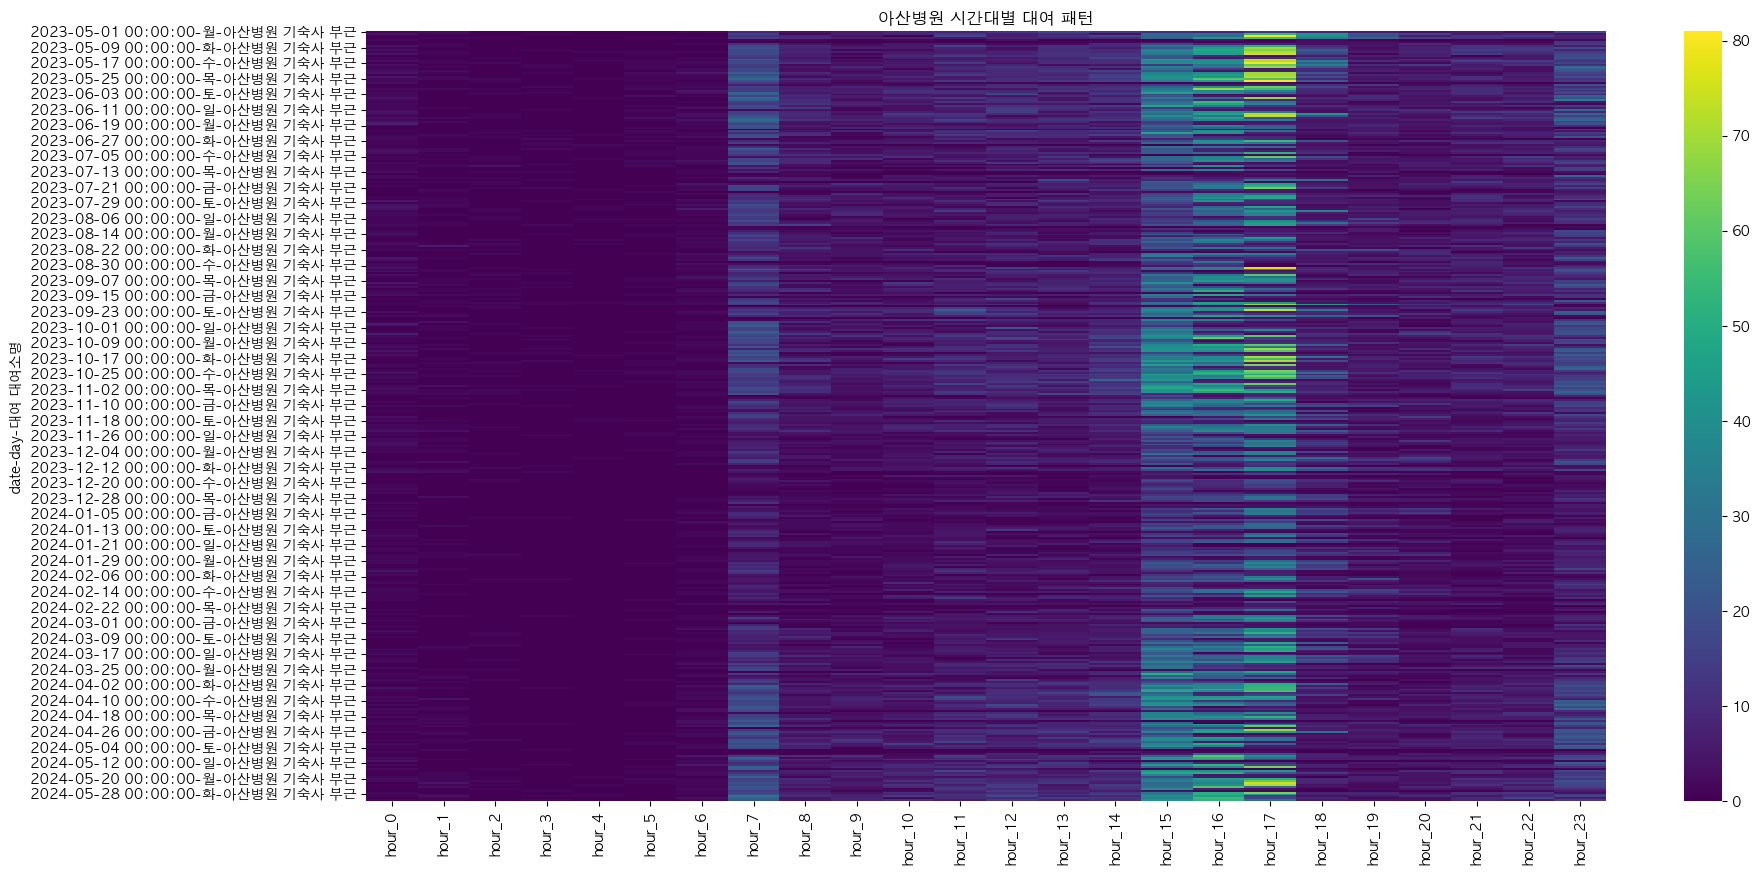

In [56]:
# 특정 대여소를 선택
station_data = rent_sum.loc[(slice(None), slice(None), '아산병원 기숙사 부근'), :]

# 히트맵 생성
plt.figure(figsize=(20, 10))
sns.heatmap(station_data, cmap='viridis')
plt.title("아산병원 시간대별 대여 패턴")
plt.show()

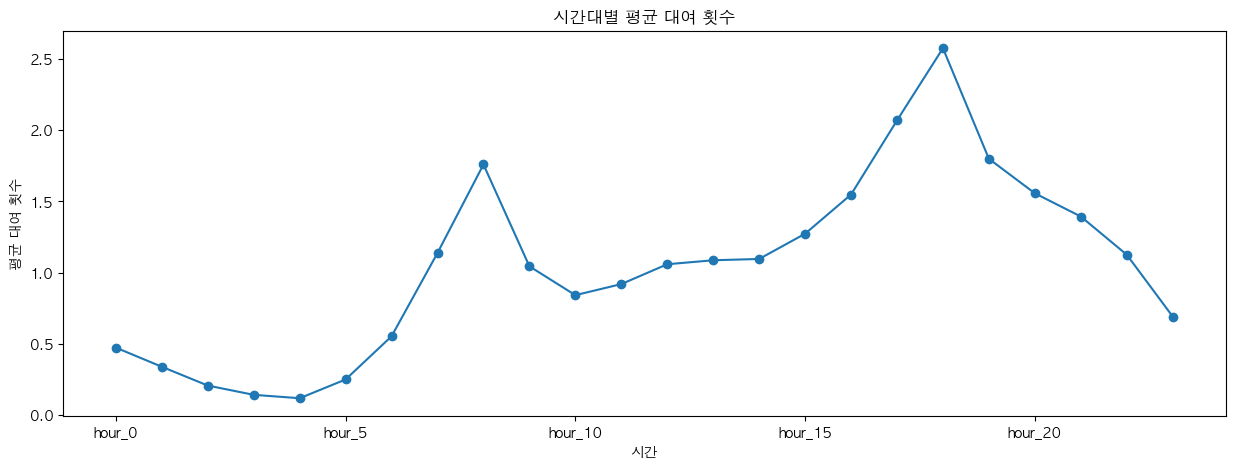

In [58]:
hourly_avg = rent_sum.mean(axis=0)

plt.figure(figsize=(15, 5))
hourly_avg.plot(kind='line', marker='o')
plt.title("시간대별 평균 대여 횟수")
plt.xlabel("시간")
plt.ylabel("평균 대여 횟수")
plt.show()

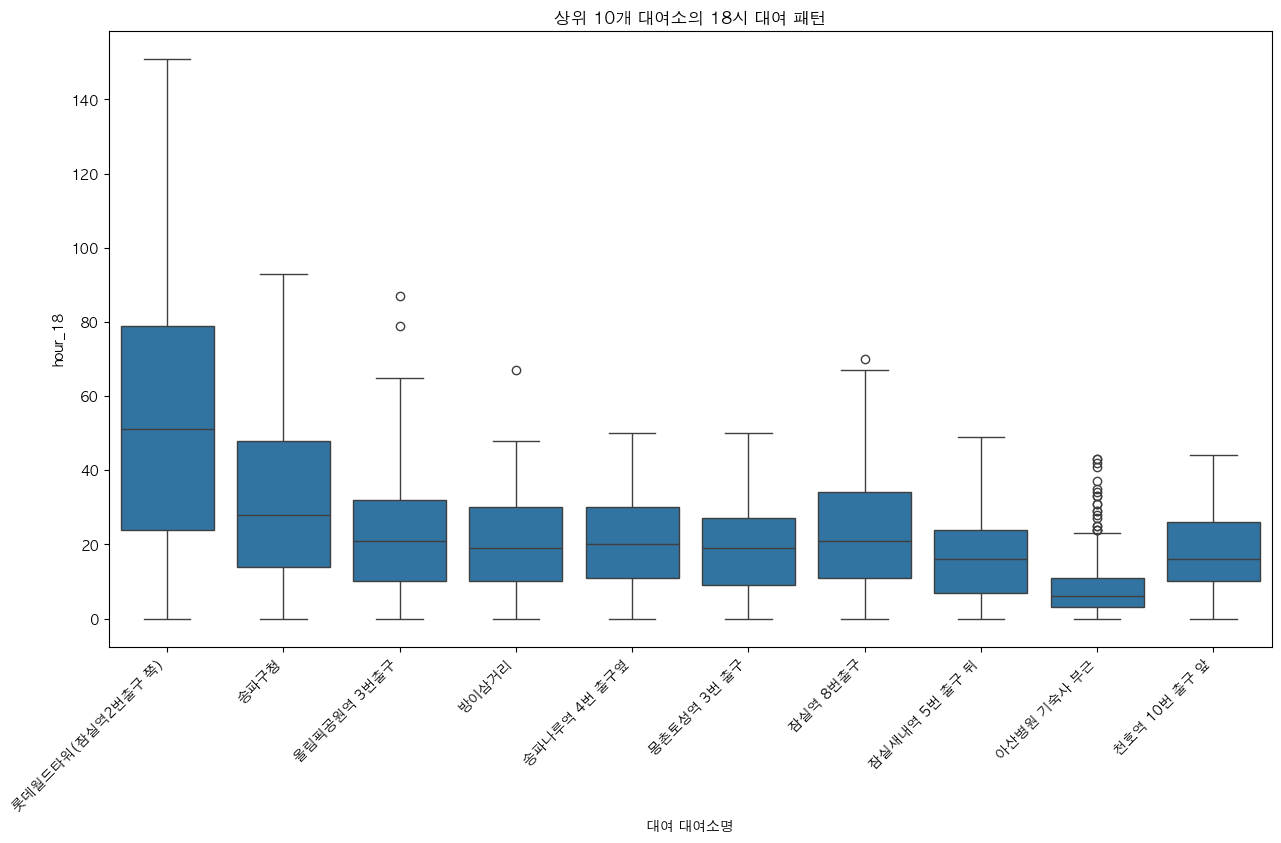

In [48]:
# 상위 10개 대여소 선택
top_10_stations = rent_sum.sum(axis=1).groupby('대여 대여소명').sum().nlargest(10).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=rent_sum.loc[(slice(None), slice(None), top_10_stations), :].reset_index(), 
            x='대여 대여소명', y='hour_18')  
plt.title("상위 10개 대여소의 18시 대여 패턴")
plt.xticks(rotation=45, ha='right')
plt.show()

In [49]:
songpa_re_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 41 columns):
 #   Column       Dtype         
---  ------       -----         
 0   자전거번호        object        
 1   반납일시         object        
 2   반납대여소번호      float64       
 3   반납대여소명       object        
 4   이용시간(분)      int64         
 5   대여대여소ID      object        
 6   반납대여소ID      object        
 7   자전거구분        object        
 8   자치구          object        
 9   반납 자치구       object        
 10  date         datetime64[ns]
 11  day          object        
 12  return_date  object        
 13  기온(°C)       float64       
 14  강수량(mm)      float64       
 15  PM10         float64       
 16  PM25         float64       
 17  hour_0       bool          
 18  hour_1       bool          
 19  hour_2       bool          
 20  hour_3       bool          
 21  hour_4       bool          
 22  hour_5       bool          
 23  hour_6       bool          
 24  hour_7       bool       

In [50]:
return_sum=songpa_re_dum.pivot_table(
                            songpa_re_dum.iloc[:,17:],
                            index=['return_date','day','반납대여소명'],
                            aggfunc='sum'
)
other_columns = [col for col in return_sum.columns if col not in hour_columns]
return_sum = return_sum.reindex(columns=other_columns + hour_columns)

In [51]:
return_sum.head(20)

hour_0  hour_1  hour_2  hour_3  hour_4  \
return_date day 반납대여소명                                                         
2023-05-01  월   3호선 매봉역 3번출구앞              0       0       0       0       0   
                63스퀘어                      0       0       0       0       0   
                9호선종합운동장역 9번출구             1       0       0       0       0   
                H비즈니스파크                    0       0       0       0       0   
                K+ 타워 앞                    0       0       0       0       0   
                KT&G강동지사                   0       0       1       0       1   
                KT&G타워 옆(상상마당 대치아트홀)       0       0       0       0       0   
                KT선릉타워                     0       0       0       0       0   
                LH강남힐스테이트아파트               0       1       0       0       0   
                LIGA 아파트 앞                 0       0       0       0       0   
                MCM 본사 직영점 앞               0       0       0       0       0   
                SSTS 몰 앞                   0       0       0       0       0   
                \N                         0       0       1       0       0   
                e편한세상 상도노빌리티 앞             0       0       0       0       0   
                가든파이브 리빙관                  0       0       0       0       0   
                가락1동주민센터                   0       1       3       0       0   
                가락2동주민센터 인근                0       1       0       0       0   
                가락고등학교 앞                   0       0       1       0       0   
                가락대림아파트 앞                  1       1       0       0       0   
                가락몰 업무동                    3       3       2       4       1   

                                      hour_5  hour_6  hour_7  hour_8  hour_9  \
return_date day 반납대여소명                                                         
2023-05-01  월   3호선 매봉역 3번출구앞              0       0       0       0       0   
                63스퀘어                      0       0       0       0       0   
                9호선종합운동장역 9번출구             1       4       1       5       1   
                H비즈니스파크                    0       0       2       4       5   
                K+ 타워 앞                    1       0       0       0       0   
                KT&G강동지사                   0       0       0       0       0   
                KT&G타워 옆(상상마당 대치아트홀)       0       0       0       0       0   
                KT선릉타워                     0       0       0       1       1   
                LH강남힐스테이트아파트               0       0       0       0       0   
                LIGA 아파트 앞                 0       0       0       0       1   
                MCM 본사 직영점 앞               0       0       0       0       0   
                SSTS 몰 앞                   0       0       0       0       0   
                \N                         0       1       0       1       2   
                e편한세상 상도노빌리티 앞             0       0       0       0       0   
                가든파이브 리빙관                  0       0       1       3       1   
                가락1동주민센터                   1       1       2       2       0   
                가락2동주민센터 인근                0       0       0       1       0   
                가락고등학교 앞                   0       0       1       0       1   
                가락대림아파트 앞                  0       2       3       4       2   
                가락몰 업무동                    0       1       1       2       2   

                                      ...  hour_14  hour_15  hour_16  hour_17  \
return_date day 반납대여소명                ...                                       
2023-05-01  월   3호선 매봉역 3번출구앞         ...        0        0        2        0   
                63스퀘어                 ...        0        0        0        2   
                9호선종합운동장역 9번출구        ...        2        6        5        5   
                H비즈니스파크               ...        1        8        3        5   
                K+ 타워 앞       

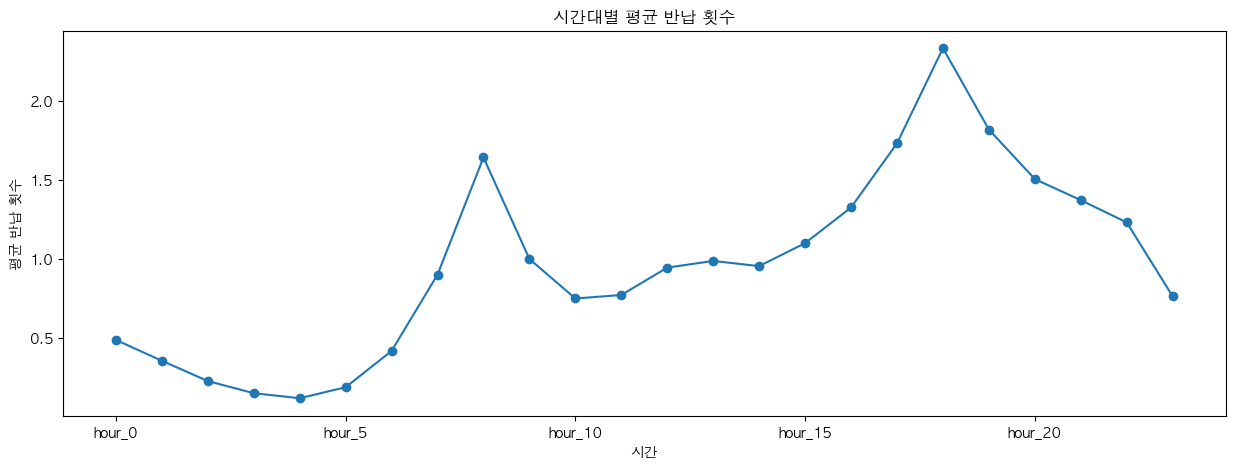

In [52]:
hourly_avg = return_sum.mean(axis=0)

plt.figure(figsize=(15, 5))
hourly_avg.plot(kind='line', marker='o')
plt.title("시간대별 평균 반납 횟수")
plt.xlabel("시간")
plt.ylabel("평균 반납 횟수")
plt.show()

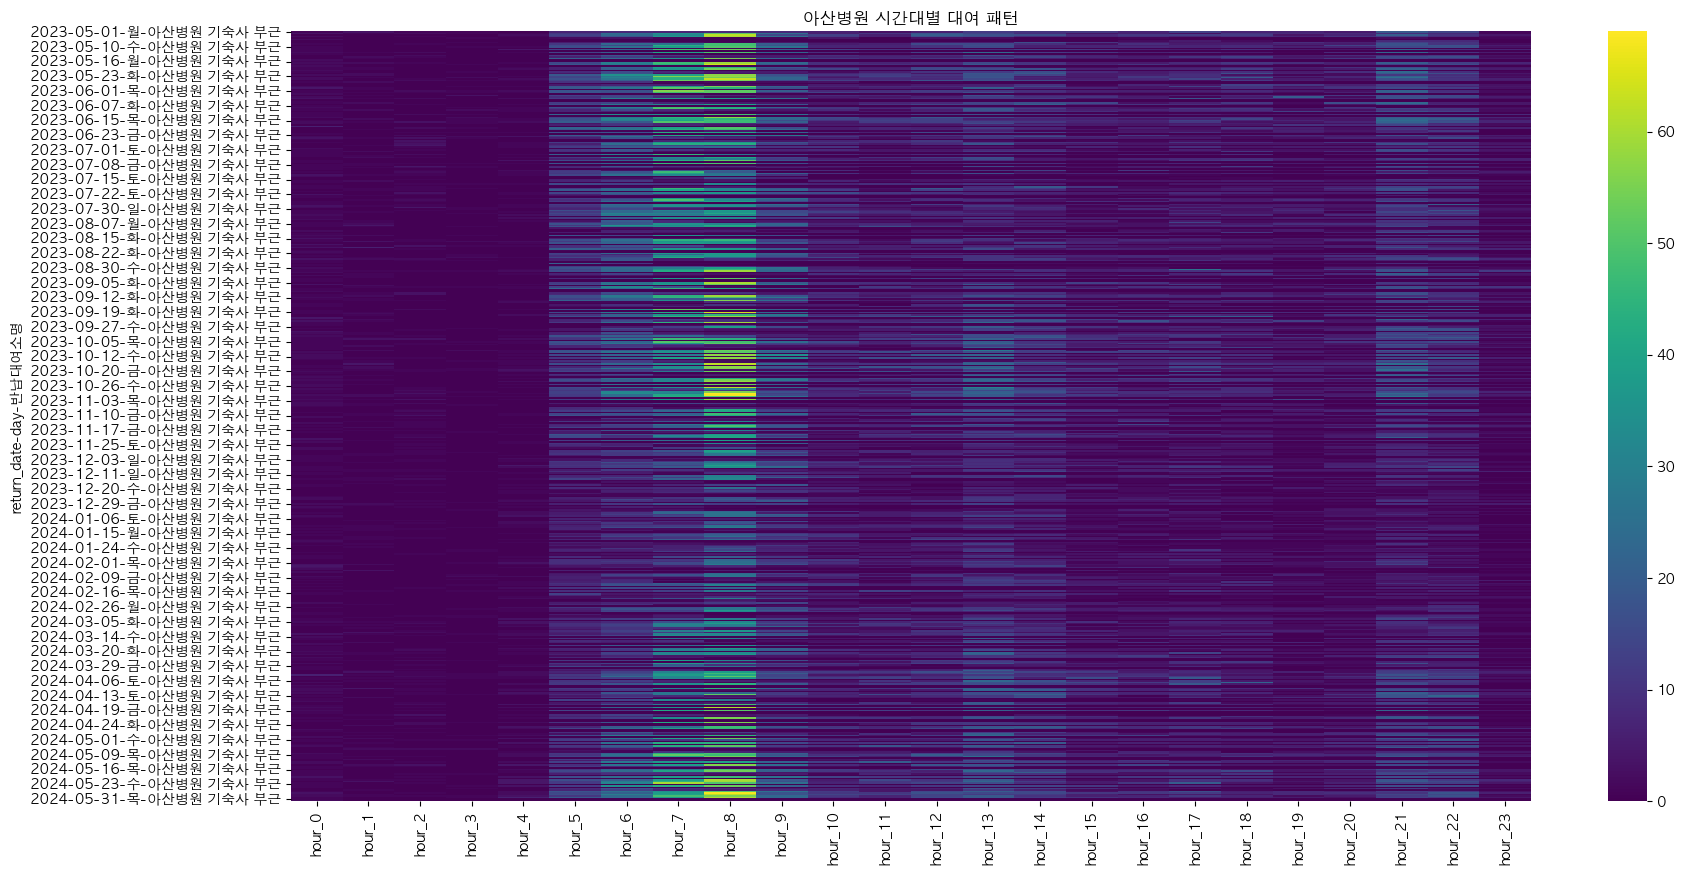

In [57]:
# popular_station = return_sum.sum(axis=1).idxmax()[2]
station_data = return_sum.loc[(slice(None), slice(None), '아산병원 기숙사 부근'), :]

# 히트맵 생성
plt.figure(figsize=(20, 10))
sns.heatmap(station_data, cmap='viridis')
plt.title("아산병원 시간대별 대여 패턴")
plt.show()

---
## 아산병원 기숙사 부근

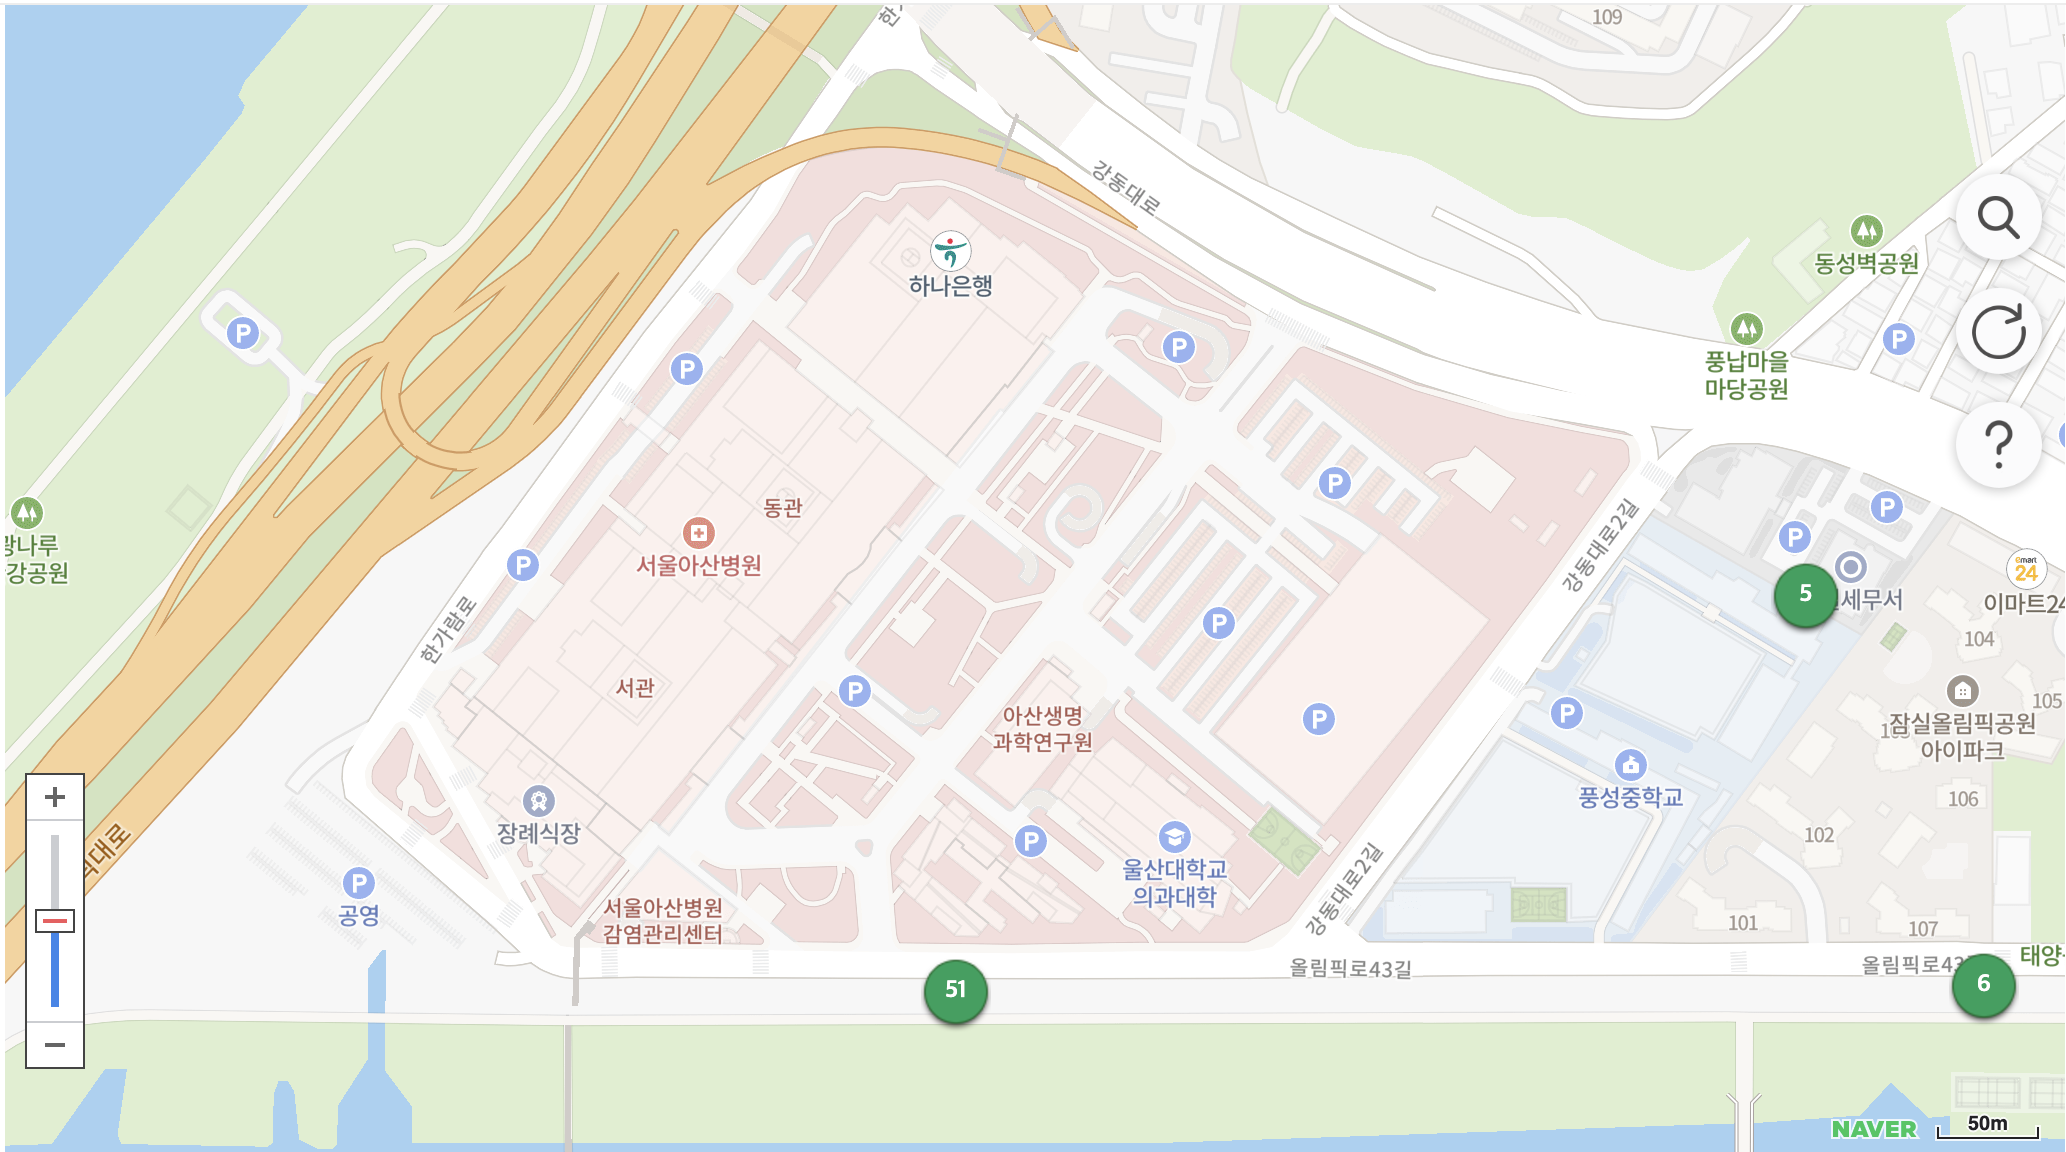
### 평일 10:30AM 실시간 자료
> 아산병원 기숙사 부근의 구획수가 50인데, 출근시간대 이후 51대의 따릉이가 주차되어 있는 것을 확인할 수 있다.

### 평일 7PM 실시간 자료 추가하기

---

In [67]:
# 모든 열 표시
pd.set_option('display.max_columns', None)

# 출력 너비 제한 해제
pd.set_option('display.width', None)

In [ ]:
asan_rent=rent_sum.loc[(slice(None), slice(None), '아산병원 기숙사 부근'), :]
asan_rent.head()

In [ ]:
asan_return=return_sum.loc[(slice(None), slice(None), '아산병원 기숙사 부근'), :]
asan_return.head()

In [68]:
asan_rent.describe()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1.184343,0.484848,0.229798,0.143939,0.070707,0.247475,0.906566,11.330808,4.318182,3.505051,4.199495,5.891414,6.212121,5.679293,6.909091,21.517677,21.292929,25.000000,8.222222,4.866162,4.247475,4.967172,4.936869,10.866162
std,1.301939,0.822021,0.532699,0.405017,0.266340,0.517412,1.037942,6.849497,3.286300,2.661964,3.072640,4.133938,4.146123,3.789483,4.507863,12.323783,16.588544,21.603563,7.958507,3.946447,3.194833,3.453332,3.432319,6.835482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,12.000000,5.000000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,6.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.500000,4.000000,3.000000,4.000000,5.000000,6.000000,5.500000,6.500000,21.000000,19.000000,19.000000,6.000000,4.000000,4.000000,5.000000,5.000000,10.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,6.000000,5.000000,6.000000,8.000000,9.000000,8.000000,10.000000,30.000000,36.000000,39.000000,11.000000,7.000000,6.000000,7.000000,7.000000,16.000000
max,7.000000,6.000000,4.000000,2.000000,2.000000,3.000000,6.000000,30.000000,16.000000,13.000000,15.000000,24.000000,21.000000,18.000000,26.000000,51.000000,68.000000,81.000000,43.000000,25.000000,16.000000,15.000000,17.000000,34.000000


In [69]:
asan_return.describe()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,0.888889,0.408046,0.440613,0.187739,0.591954,6.863985,10.770115,15.222222,19.434866,8.632184,4.557471,4.189655,5.264368,8.346743,6.113027,3.580460,3.498084,4.208812,3.655172,2.484674,2.948276,7.752874,6.057471,1.712644
std,0.914330,0.761459,0.769698,0.445927,0.906456,5.880666,9.487684,16.174446,20.765498,8.500128,4.116065,4.030647,5.014665,7.131913,5.401061,3.526462,3.412323,4.167841,3.700892,2.715696,2.916497,6.829304,5.307850,1.992739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,10.000000,8.000000,9.000000,5.000000,4.000000,4.000000,4.000000,8.500000,6.000000,3.000000,3.000000,4.000000,3.000000,2.000000,2.000000,7.500000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,18.000000,30.750000,37.000000,16.000000,8.000000,7.000000,9.000000,14.000000,10.000000,6.000000,6.000000,7.000000,6.000000,4.000000,5.000000,13.000000,10.000000,3.000000
max,6.000000,6.000000,4.000000,3.000000,6.000000,23.000000,36.000000,60.000000,69.000000,34.000000,16.000000,20.000000,20.000000,30.000000,21.000000,16.000000,17.000000,26.000000,22.000000,20.000000,16.000000,26.000000,22.000000,12.000000


> 대여 수는 퇴근시간대(3~6시)가 월등히 많고, 반납 수는 출근시간대(5~9)가 월등히 많다.

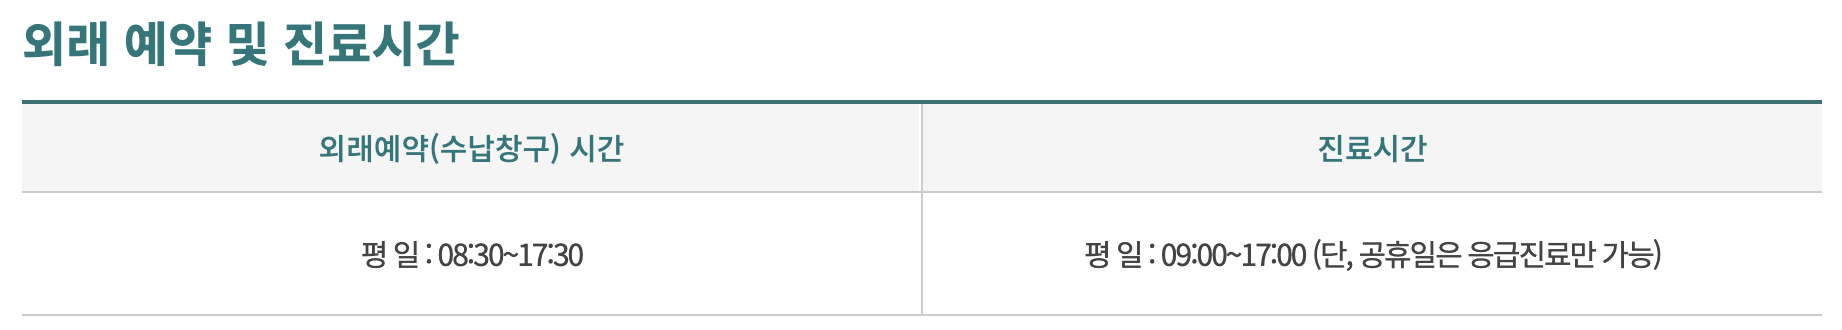

In [70]:
songpa_dum.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간(분),대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,date,day,기온(°C),강수량(mm),PM10,PM25,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,ST-1864,ST-1864,일반자전거,송파구,송파구,2024-04-01,월,9.5,0.0,54.0,13.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,1,ST-1584,ST-2596,일반자전거,송파구,송파구,2024-04-01,월,9.5,0.0,54.0,13.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,3,ST-2957,ST-2972,일반자전거,송파구,송파구,2024-04-01,월,9.5,0.0,54.0,13.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,ST-1719,ST-1719,일반자전거,송파구,송파구,2024-04-01,월,9.5,0.0,54.0,13.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,8,ST-2581,ST-2598,일반자전거,송파구,송파구,2024-04-01,월,9.5,0.0,54.0,13.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
asan_dum=songpa_dum[songpa_dum['대여 대여소명']=='아산병원 기숙사 부근']

In [72]:
asan_dum.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간(분),대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,date,day,기온(°C),강수량(mm),PM10,PM25,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
1047,SPB-37625,2024-04-01 07:07:54,4457,아산병원 기숙사 부근,13,ST-2574,ST-502,일반자전거,송파구,강동구,2024-04-01,월,5.7,0.0,58.0,19.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1052,SPB-57909,2024-04-01 07:07:14,4457,아산병원 기숙사 부근,14,ST-2574,ST-1083,일반자전거,송파구,송파구,2024-04-01,월,5.7,0.0,58.0,19.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1073,SPB-65842,2024-04-01 07:13:25,4457,아산병원 기숙사 부근,10,ST-2574,ST-1041,일반자전거,송파구,강동구,2024-04-01,월,5.7,0.0,58.0,19.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1115,SPB-41814,2024-04-01 07:14:38,4457,아산병원 기숙사 부근,12,ST-2574,ST-2592,일반자전거,송파구,송파구,2024-04-01,월,5.7,0.0,58.0,19.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1117,SPB-68613,2024-04-01 07:16:44,4457,아산병원 기숙사 부근,10,ST-2574,ST-1041,일반자전거,송파구,강동구,2024-04-01,월,5.7,0.0,58.0,19.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
asan_re_dum=songpa_re_dum[songpa_re_dum['반납대여소명']=='아산병원 기숙사 부근']

In [75]:
asan_re_dum.head()

,자전거번호,반납일시,반납대여소번호,반납대여소명,이용시간(분),대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,date,day,return_date,기온(°C),강수량(mm),PM10,PM25,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
158,SPB-65842,2024-04-01 01:04:07,4457.0,아산병원 기숙사 부근,9,ST-2876,ST-2574,일반자전거,송파구,송파구,2024-04-01,월,2024-04-01,9.5,0.0,54.0,13.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
247,SPB-58807,2024-04-01 01:44:30,4457.0,아산병원 기숙사 부근,17,ST-1046,ST-2574,일반자전거,강동구,송파구,2024-04-01,월,2024-04-01,8.6,0.0,54.0,15.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
264,SPB-46317,2024-04-01 01:53:35,4457.0,아산병원 기숙사 부근,5,ST-3148,ST-2574,일반자전거,송파구,송파구,2024-04-01,월,2024-04-01,8.6,0.0,54.0,15.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
306,SPB-62606,2024-04-01 02:13:49,4457.0,아산병원 기숙사 부근,18,ST-501,ST-2574,일반자전거,강동구,송파구,2024-04-01,월,2024-04-01,8.6,0.0,54.0,15.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
434,SPB-43896,2024-04-01 04:31:42,4457.0,아산병원 기숙사 부근,31,ST-2309,ST-2574,일반자전거,광진구,송파구,2024-04-01,월,2024-04-01,6.7,0.0,57.0,18.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**반납데이터라도 미세먼지(PM)는 대여 시간 기준으로 추가를 해두었다.**
> 그래서 같은 hour라도 미세먼지는 다를 수 있음.

In [79]:
songpa_merge.to_csv('../data/songpa_merge.csv',index=False)